### 

D2_kin13
         Xbj    Ne     Yield         Error     yield
14  0.620471  1306  0.000004  1.245830e-07  0.000004
15  0.647189  3739  0.000013  2.164430e-07  0.000013
16  0.677183  4170  0.000015  2.319160e-07  0.000015
17  0.709268  2768  0.000010  1.894240e-07  0.000010
18  0.739429  1512  0.000005  1.403520e-07  0.000005
19  0.768304   362  0.000001  6.893370e-08  0.000001
D2_kin11
         Xbj    Ne     Yield         Error     yield
12  0.553559  2729  0.000019  3.691290e-07  0.000019
13  0.582428  5022  0.000035  5.148460e-07  0.000035
14  0.613120  4310  0.000031  4.807000e-07  0.000031
15  0.644483  2821  0.000020  3.897320e-07  0.000020
16  0.674063  1157  0.000008  2.498130e-07  0.000008
D2_kin15
         Xbj    Ne         Yield         Error         yield
16  0.687411   632  8.041540e-07  3.383550e-08  8.041540e-07
17  0.711450  3031  3.892700e-06  8.859830e-08  3.892700e-06
18  0.742119  4160  5.405460e-06  1.118920e-07  5.405460e-06
19  0.772898  3159  4.151200e-06  9.3254

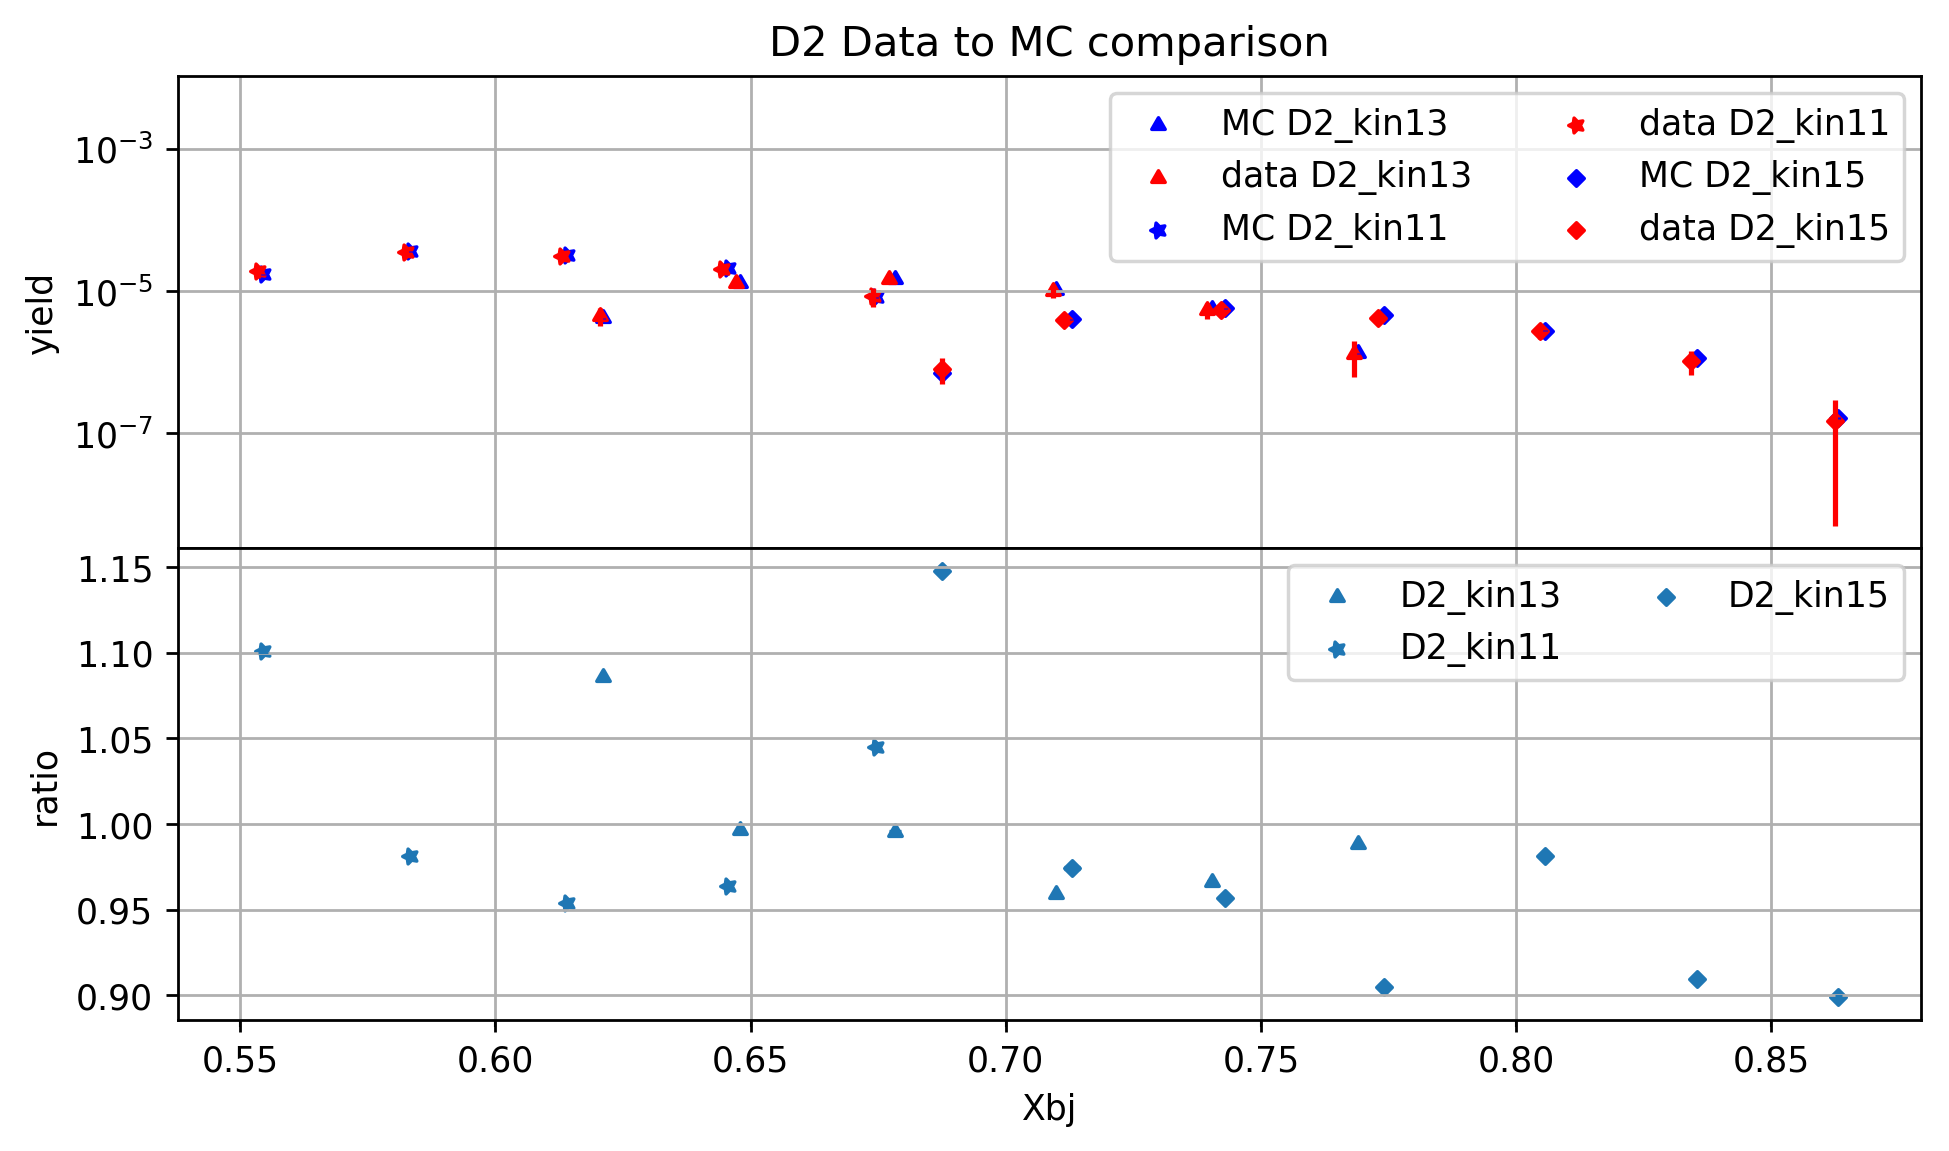

In [17]:
# %load full_phys.py
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import math
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np

Xaxis="Xbj" #theta / Xbj
if Xaxis == "Xbj":
    xaxis="xbj"
else :
    xaxis="theta"

    
tgt="D2"
kinnum=13

#runs=[1207,1233,1279,2570,1344,2632]
#if len(sys.argv) >1:
#    for i in range(1,len(sys.argv),1):
#        runs.append(sys.argv[i])
#else :
#    print('Please enter the runs you want to look at! -1 when done')
#    run=0
#    i=0
#    while run is not -1:
#        i=i+1
#        run=int(input("{}  ".format(i)))
#        if run==-1:
#            break
#        runs.append(run)       
#print( "Will look at runs ", runs)
bins=25
mcfile='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}bins/{}/'.format(bins,xaxis)
datafile='/home/jbane/tritium/Tri_offline/yield/yield_output/{}bins/{}/'.format(bins,xaxis)
kins={}
kin={}

#kins=glob.glob('{}{}*.dat'.format(mcfile,tgt))

kins[0]='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}bins/{}/{}_kin{}.dat'.format(bins,xaxis,tgt,kinnum)
kins[1]='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}bins/{}/{}_kin{}.dat'.format(bins,xaxis,tgt,kinnum-2)
kins[2]='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}bins/{}/{}_kin{}.dat'.format(bins,xaxis,tgt,kinnum+2)
#kins[1]='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}bins/{}/{}_kin{}.dat'.format(bins,xaxis,tgt,kinnum+6)



mcDF={}
dataDF={}
mcDFs={}
dataDFs={}
ratios={}
i=0
for i in range(len(kins)):
    kin[i] = kins[i].replace(mcfile,"")
    kin[i] = kin[i].replace('.dat',"")
    print(kin[i])
    mcfileR=mcfile+'{}.dat'.format(kin[i])
    datafileR=datafile+'{}.dat'.format(kin[i])
    #print(datafileR)
    chk1=0
    chk=0
    if os.path.isfile(mcfileR):
        chk=1
    else:
        ("MC file does not exist") 
        chk=0
    if os.path.isfile(datafileR):
        chk1=1
    else :
        print("Data file does not exist")
        chk1=0
    if chk==0 or chk1==0:
        continue     

    mcDF[i]=pd.read_table(mcfileR,delim_whitespace=True)
    dataDF[i]=pd.read_table(datafileR,delim_whitespace=True)
    mcDF[i]['yield']=mcDF[i]['Yield']/1000.0
    mcDF[i]['Error']=mcDF[i]['Error']/1000.0
    
    dataDF[i]['yield']=dataDF[i]['Yield']
    mcmed=mcDF[i]['yield'].mean()
    datamed=dataDF[i]['yield'].mean()
    mcDFs[i]=mcDF[i][mcDF[i]['yield'] >=mcmed *0.2]
    dataDFs[i]=dataDF[i][dataDF[i]['yield'] >= datamed *0.2]
    print(dataDFs[i])
    mcDFs[i]=mcDFs[i].dropna()
    dataDFs[i]=dataDFs[i].dropna()
    
       
    #cut put the edge bins for now
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    last= len(dataDFs[i].index)
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-2])
    
    minind= dataDFs[i].index[0]
    maxind=dataDFs[i].index[len(dataDFs[i].index)-1]
    
    #mcDFs[i]=mcDFs[i][mcDFs[i].index>=minind]
    #mcDFs[i]=mcDFs[i][mcDFs[i].index<=maxind]
    
    #mcDFs[i][~mcDFs[i].isin(dataDFs[i])].dropna()
    
    #mcDFs[i]=mcDFs[i][dataDFs[i]['yield']>0]
    
    
    #dataDFs[i]['Ne_fl']=dataDFs[i]['Ne'].astype(float)
    
    #print((dataDFs[i]['Ne'].astype(float)))
    dataDFs[i]['Stat_err']=1.0/np.sqrt((dataDFs[i]['Ne']))*dataDFs[i]['yield']*10
    #dataDFs[i]= dataDFs[i].drop(dataDFs[i].index[[0,len(dataDFs[i])-1]])
    #mcDFs[i]=     mcDFs[i].drop(mcDFs[i].index[  [0,  len(mcDFs[i])-1]])
    
    ratios[i] = mcDFs[i].copy()
    #ratios[i].drop('yield')
    ratios[i]['data_Y'] =dataDFs[i]['yield']
    ratios[i]['MC_Y'] = mcDFs[i]['yield']
    ratios[i]['ratio'] = dataDFs[i]['yield']/mcDFs[i]['yield']
    ratios[i]['offset'] = dataDFs[i]['{}'.format(Xaxis)] - mcDFs[i]['{}'.format(Xaxis)]
    
    
 
    i=i+1
    
import matplotlib._color_data as mcd
overlap = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]

markers =[[3,0,0]  ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0] ,[4,1,0],[3,0,0]]
markers2 =[[3,0,0] ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,70],[4,1,0],[3,0,0]]
colors=['red', 'Green', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta','Teal','Brown','Maroon','Mint','Navy']#, f032e6, bcf60c, fabebe, 008080, e6beff, 9A6324, fffac8, 800000, aaffc3, 808000, ffd8b1, 000075, a9a9a9, ffffff, 000000]
fig= plt.figure(dpi=250,figsize=(9,5))
ax=fig.add_subplot(2,1,1)
plt.title('{} Data to MC comparison'.format(tgt))
bx=fig.add_subplot(2,1,2, sharex=ax)

#fig,bx=plt.subplots(dpi=250)
k=int(0)
for j in range(len(mcDF)):
    xkcd = mcd.XKCD_COLORS["xkcd:" + overlap[j]].upper()
    xkcd2 = mcd.XKCD_COLORS["xkcd:" + overlap[j+len(mcDF)]].upper()
    print(j , kin[j])
    if k == 7:
        k = 0
    if(len(dataDFs[j])) == 0:
        continue
    #if j == 110:
     #   ax = mcDFs[j].plot(x='theta',y='yield',yerr=':error',kind='scatter', marker=markers[j], color='blue', label='MC run{}'.format(runs[j]))
    #else :
    mcDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Error',kind='scatter',marker=markers[j], color='blue', label='MC {}'.format(kin[j]))
    
    dataDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield', yerr='Stat_err',kind='scatter', marker=markers2[j], color='red', label='data {}'.format(kin[j]))
    
    #dataDFs[j].plot(ax=ax,x='theta',y='yield',yerr='Stat_err' ,marker=[1,0,0],kind='scatter', color='green' )
    
    ratios[j].plot(ax=bx,x='{}'.format(Xaxis) ,y='ratio', xerr='offset', kind='scatter', label='{}'.format(kin[j]),marker=markers2[j] )
    k=k+1
    print(j , kin[j])    
ax.set_yscale("log")
ax.grid(True)
bx.grid(True)
ax.legend(ncol=2)
bx.legend(ncol=2)

fig.subplots_adjust(hspace=0)
print("Data")
print(dataDFs[0])
print("MC")
print(mcDFs[0])
print("Ratio")
print(ratios[0][['{}'.format(Xaxis),'ratio','offset']])


fig.savefig('images/{}_kin{}.png'.format(tgt,kinnum))



# plt.show()

In [4]:
mcDFs[0]

,Xbj,Ne,Yield,Error,yield
0,0.178489,10430,1.49849,0.000015,0.001498
1,0.198975,112654,14.20830,0.000042,0.014208
2,0.229779,114394,10.31740,0.000031,0.010317
3,0.253608,40028,2.81008,0.000014,0.002810


In [18]:
1/0.000499 * 2.396640e-06

0.004802885771543086

In [24]:
print((1/math.sqrt(2.0)),  math.sqrt(pow(1/math.sqrt(1000.0),2)) )

0.03162277660168379 0.03162277660168379


In [54]:
(1.0-0.91/1.0) 

False

In [56]:
0.91/1


0.91

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))